# Avaliação - Parte Prática
Davi Giordano Valério - 11805273

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

In [6]:
data_train_np = pd.read_csv(
    "https://media.githubusercontent.com/media/psi3471/datasets/main/disease_prediction/disease_train.csv"
).drop(columns=["Unnamed: 0"])

data_test_np = pd.read_csv(
    "https://media.githubusercontent.com/media/psi3471/datasets/main/disease_prediction/disease_test.csv"
).drop(columns=["Unnamed: 0"])

In [11]:
data_train_np.head()

,0,1,2,3,4,5,6,7,8
0,6.000000,123.0,72.0,45.000000,230.000000,33.6,0.733,34.0,0.0
1,7.000000,159.0,66.0,20.536458,79.799479,30.4,0.383,36.0,1.0
2,3.845052,127.0,80.0,37.000000,210.000000,36.3,0.804,23.0,0.0
3,3.845052,105.0,64.0,41.000000,142.000000,41.5,0.173,22.0,0.0
4,3.000000,111.0,56.0,39.000000,79.799479,30.1,0.557,30.0,0.0


In [40]:
eta = 0.01
Nb = 50
Ne = 100

In [41]:
dados_treino = torch.tensor(data_train_np.to_numpy(), dtype=torch.float32)

train_set = [
    (dados_treino[:, 0:8], dados_treino[:, [8]])
    for i in range(dados_treino.shape[0])
]
train_loader = torch.utils.data.DataLoader(train_set, batch_size=Nb, shuffle=True)

In [42]:
class Model(nn.Module):

    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self):
        # Necessário chamar __init__() da classe mãe
        super().__init__()
        
        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com 2 elementos, conectada a 3 neurônios
            nn.Linear(8, 3),
            # Função de ativação Tanh
            nn.Tanh(),
            
            # Saídas de 3 neurônios conectadas a 5 neurônios
            nn.Linear(3, 5),
            nn.Tanh(),
            
            nn.Linear(5, 5),
            nn.Tanh(),
            
            nn.Linear(5, 2),
            nn.Tanh(),
            
            nn.Linear(2, 1),
            nn.Tanh(),            
        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")    

model = Model().to(device=device)

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=eta)

Época: 0 Loss: 0.3662468492984772


Text(0, 0.5, 'Loss')

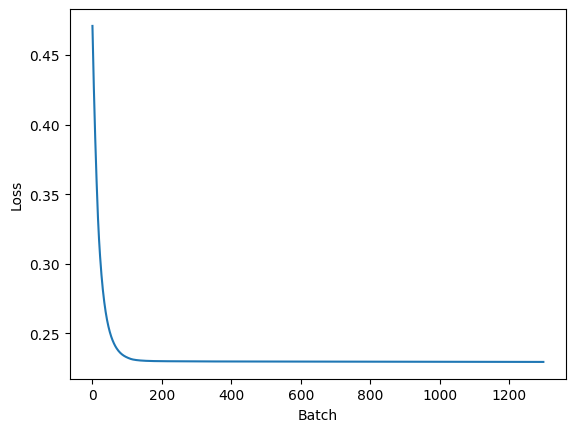

In [44]:
# Lista usada para guardar o valor da função custo ao longo das iterações
losses = []

# Loop das épocas
for epoch in range(Ne):
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader):

        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.to(device=device)
        
        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os 
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model.zero_grad()
        
        # Calcula a saída
        y = model(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)
        
        # Calcula os gradientes
        loss.backward()
        
        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer.step()
        
        # Armazena o valor da função custo
        losses.append(loss.item())
        
        # Mostra o valor da função custo a cada 100 épocas        
        if epoch % 100 == 0 and n == dados_treino.shape[0]//Nb - 1:
            print(f"Época: {epoch} Loss: {loss}")

plt.figure()
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")

In [45]:
dados_teste = data_test_np.to_numpy()
xteste = torch.tensor(dados_teste[:, 0:8], dtype=torch.float32).to(device=device)
dteste = torch.tensor(dados_teste[:,[8]], dtype=torch.float32).to(device=device)

In [46]:
yteste = model(xteste)
yteste_np = yteste.cpu().detach().numpy()

In [50]:
Taxa_de_erro = np.sum(np.absolute(dteste - yteste_np_dec)) * 100 / (2 * Nteste)

print(f"Taxa de erro: {Taxa_de_erro}")

NameError: name 'dteste_np' is not defined